#**1 ) Plot the Price vs. #Rooms and Price vs. Area using suitable diagrams.**

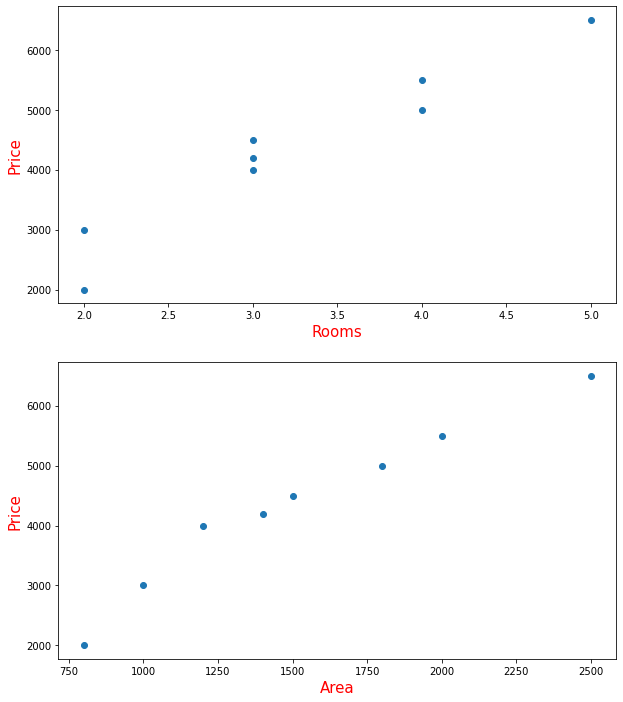

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array([[2,800],[2,1000],[3,1200],[3,1400],[3,1500],[4,1800],[4,2000],[5,2500]])
y = np.array([[2000],[3000],[4000],[4200],[4500],[5000],[5500],[6500]])

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.scatter(X[:,0],y)
plt.xlabel("Rooms",color="red",fontsize = 15)
plt.ylabel("Price",color="red",fontsize = 15)

plt.subplot(2,1,2)
plt.scatter(X[:,1],y)
plt.xlabel("Area",color="red",fontsize = 15)
plt.ylabel("Price",color="red",fontsize = 15)

plt.show()


#**2)Write the Linear regression formula for predicting the Price of an apartment given its number of rooms and floor area.**


### Multiple Linear Regression Equation

Firstly , we will fit the linear regression parameters $\beta$ to our dataset using gradient descent.Here , 
$\beta$ = 

\begin{array}{|c|}
          b0\\
          b1\\
          b2\\
          \end{array}

As we have 2 features in our data set.



The objective of linear regression is to minimize the cost function

$$ J(\beta) = \frac{1}{2m} \sum_{i=1}^m \left( (P^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $P$ is given by the linear model
$$P =  h_\theta(x) = \beta^TX = b_0 + b_1 x_1 + b_2x_2$$

the parameters of our model are the $\beta_j$ values. These are
the values we will adjust to minimize cost $J(\beta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \beta_j = \beta_j - \alpha \frac{1}{N} \sum_{i=1}^N \left( (P^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \beta_j \text{ for all } j$$

With each step of gradient descent,our parameters $\beta_j$ come closer to the optimal values that will achieve the lowest cost J($\beta$).

But we will implement multiple linear regression using matrix or numpy arrays.
 



#**3) Implement Gradient Descent Optimization for estimating the parameters of a multi linear regression model in Python. [Use numpy for matrix handling].**

In [ ]:

import numpy as np

#       ----------   i. Make the input matrix X of size (N X M)   ------------

X = np.array([[2,800],[2,1000],[3,1200],[3,1400],[3,1500],[4,1800],[4,2000],[5,2500]])
print("size of X : " , X.shape)


#     -----------   ii. Scale each feature, i. e. divide each xi by Max(xi)  ----------

mu = 0
x_norm = X.copy()
mu = np.zeros(X.shape[1])
mu = np.max(X,axis=0)
x_norm = X/mu

#     -----------  ii.  Append a column of ones at the beginning of X to make the matrix (N X (M+1)) ----------
X = np.concatenate([np.ones((8, 1)), x_norm], axis=1)
print("after adding column 1 , size of X : " , X.size)


#    ------------  iv. Make the output vector Y of size (N X 1)  -----------------
y = np.array([[2000],[3000],[4000],[4200],[4500],[5000],[5500],[6500]])
print("Size of y : " , y.size)
m=y.size

#   ------------    v.  Initialize the weight vector B of size ((M+1) X 1) with small random numbers. -----------
B = np.array([[10],[15],[20]])

#   -----------     vi. Set an error threshold L, maximum number of iterations MaxIt and learning rate ⴄ. ---------
L = 100000000
iter = 12000
learning_rate = 0.001

#   -----------       vii. For Loss > Threshold L or until Max Iteration exceeds:  -------------

B = np.array([[10],[15],[20]])
MSE_a=[]
for i in range(iter):

  J=0
  P = np.dot(X,B)
  E = np.subtract(P,y)
  J = np.dot(np.transpose(E) , E)
  MSE = (1/(2*m)) * J
  msse = np.dot(np.transpose(X) ,E)
  # grad = np.dot((1/y.size) , msse )
  grad = msse / y.size
  B = B.copy()
  J_history = []


  B = B - learning_rate*grad

  P = np.dot(X,B)
  E = np.subtract(y,P)

  J = np.dot(np.transpose(E) , E)
  mse = (1/(2*m)) * J

  if mse > L :
    break;

  MSE_a.append(mse[0][0])


#    -----------  viii. Print the model weights B    ---------------
print("\nModel Weights B : \n")
print(B)

MSE_array = np.array(MSE_a)





X_test = np.array([[1,2,800],[1,2,1000],[1,3,1200],[1,3,1400],[1,3,1500],[1,4,1800],[1,4,2000],[1,5,2500]])
mu = np.max(X_test,axis=0)
X_test = X_test/mu

price = np.dot(X_test,B)
print("\nPredicted Price of the Input Data : \n", price)


size of X :  (8, 2)
after adding column 1 , size of X :  24
Size of y :  8

Model Weights B : 

[[1548.14889667]
 [2219.57875153]
 [2297.1949377 ]]

Predicted Price of the Input Data : 
 [[3171.08277734]
 [3354.85837236]
 [3982.54971768]
 [4166.32531269]
 [4258.2131102 ]
 [4977.79225303]
 [5161.56784805]
 [6064.92258589]]


#**4) Show the changes in error in a plot.**

116348.7871614075


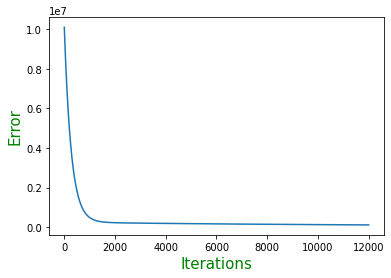

In [ ]:
import matplotlib.pyplot as plt
i = np.arange(0,iter,1)
plt.plot(i,MSE_array)
plt.xlabel("Iterations",color="green",fontsize = 15)
plt.ylabel("Error",color="green",fontsize = 15)
print(MSE_array[-1])

#**5) Print the estimated model.**

Text(0.5, 0, 'Price')

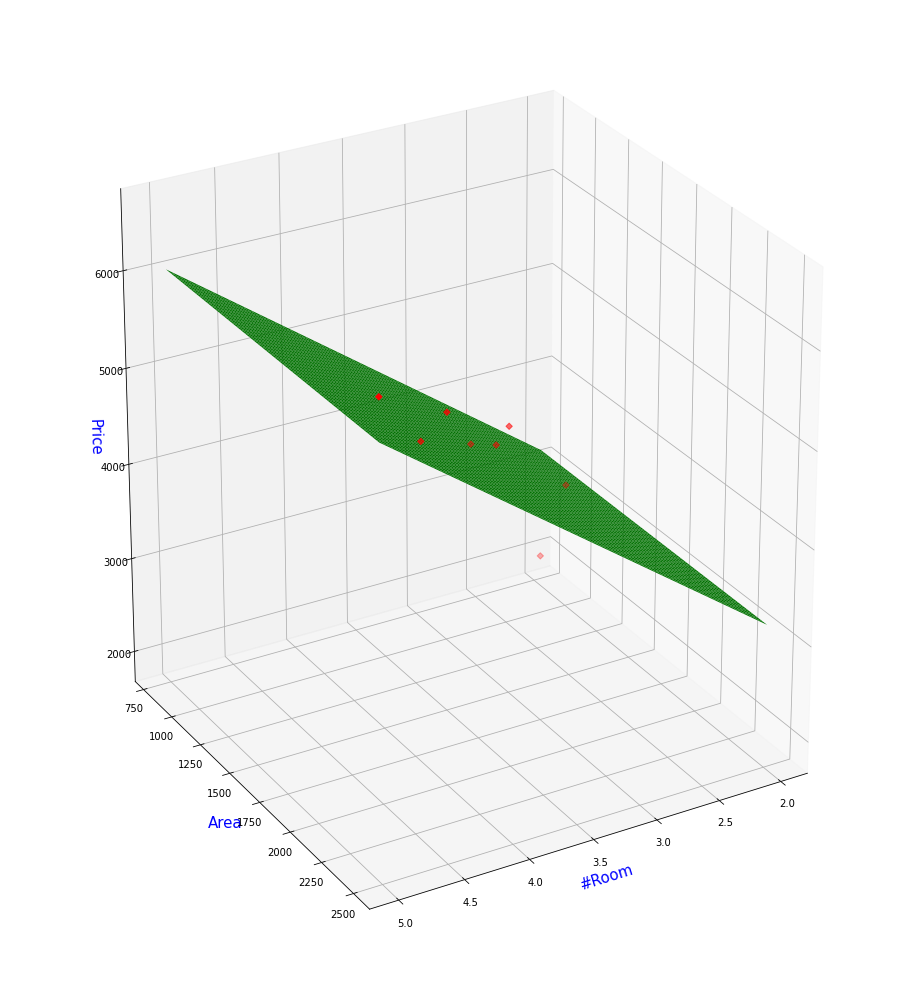

In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def test_(X_test,dim):
  mu = np.max(X_test,axis=0)
  X_test = X_test/mu
  X_test = np.concatenate([np.ones((dim, 1)), X_test], axis=1)
  price = np.dot(X_test,B)
  return price


def z_fun(x,y):
  x = np.concatenate([x,y],axis=1)
  return test_(x,200)

x = np.linspace(2,5,200)
x1 = x.reshape(200,1)
y_new = np.linspace(800,2500,200)
y1 = y_new.reshape(200,1)


Z = z_fun(x1,y1)
fig = plt.figure(figsize=(16,18))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(25, 60)

y = np.array([[2000],[3000],[4000],[4200],[4500],[5000],[5500],[6500]])

X = np.array([[2,800],[2,1000],[3,1200],[3,1400],[3,1500],[4,1800],[4,2000],[5,2500]])
ax.scatter(X[:,0], X[:,1], y, marker="D", color='red')

X_new,Y_new = np.meshgrid(x1,y1)
Z = Z.reshape(1,200)

ax.plot_surface(X_new,Y_new,Z,color='g')

ax.set_xlabel("#Room",color="b",fontsize = 15)
ax.set_ylabel("Area",color="b",fontsize = 15)
ax.set_zlabel("Price",color="b",fontsize = 15)


#**6) Calculate total loss for your estimated model.**

In [ ]:
MSE_value = MSE_array[-1]
print("MSE : " , MSE_value)
import math
rmse = math.sqrt(MSE_value)
print("RMSE : " ,rmse)


MSE :  116348.7871614075
RMSE :  341.09938018326494


#**7) Generate some test data and predict the Price for that using your model.**

In [ ]:
X_testData = np.array([[2,500],[6,300],[10,600],[3,1400],[6,1500],[4,1800]])
output = test_(X_testData,X_testData.shape[0])
print("Predicted Price for Randomly Generated Data : \n",output)

Predicted Price for Randomly Generated Data : 
 [[2630.17435189]
 [3262.76197053]
 [4533.45929409]
 [4000.72969589]
 [4794.22526233]
 [4733.17533498]]


#**8. Implement Multi-Linear Regression using Python’s Library.**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = np.array([[2,800],[2,1000],[3,1200],[3,1400],[3,1500],[4,1800],[4,2000],[5,2500]])
y = np.array([[2000],[3000],[4000],[4200],[4500],[5000],[5500],[6500]])

mu = np.max(X,axis=0)
x_norm = X/mu
X = np.concatenate([np.ones((8, 1)), x_norm], axis=1)

model = LinearRegression()

model.fit(X, y)

model = LinearRegression().fit(X, y)

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

price_test = model.predict(X)
# print(price_test)
model.score(X,y)
mean_squared_error(y,price_test)



coefficient of determination: 0.9542719706512515
intercept: [450.70422535]
slope: [[   0.         1320.42253521 4964.78873239]]


79330.98591549297

# **9. Repeat Tasks 5-7 and compare.**

**Plotting Estimated Model By Multiple Linear Regression Function of Python**

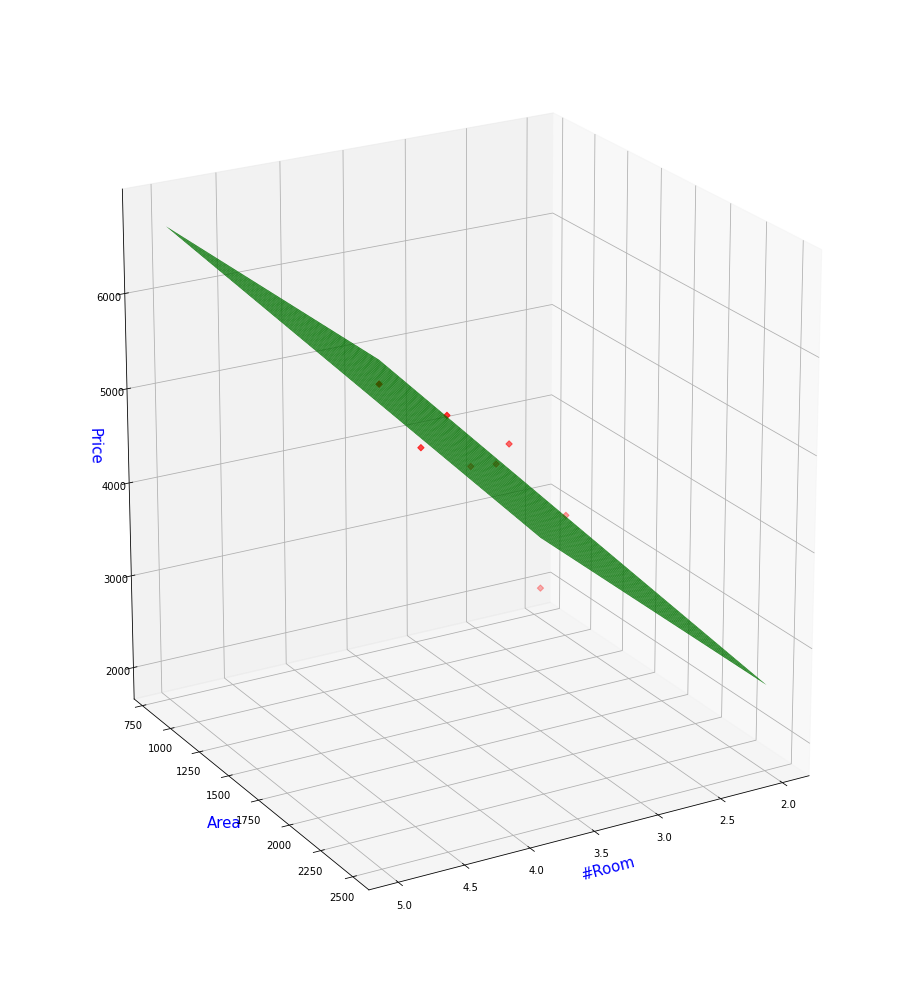

In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# ax = plt.axes(projection="3d")


def z_fun_BuiltInFunction(x,y,dim):
  x = np.concatenate([x,y],axis=1)
  x = np.concatenate([np.ones((dim, 1)), x], axis=1)
  mu = np.max(x,axis=0)
  x = x/mu
  # print(x[:,2])
  return model.predict(x)

x = np.linspace(2,5,200)
x1 = x.reshape(200,1)
y_new = np.linspace(800,2500,200)
y1 = y_new.reshape(200,1)


Z = z_fun_BuiltInFunction(x1,y1,200)
fig = plt.figure(figsize=(16,18))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 60)

y = np.array([[2000],[3000],[4000],[4200],[4500],[5000],[5500],[6500]])

ax.scatter(X[:,0], X[:,1], y, marker="D", color='red')
# print(Z)
X_new,Y_new = np.meshgrid(x1,y1)
Z = Z.reshape(1,200)
ax.plot_surface(X_new,Y_new,Z,color='g')
ax.set_xlabel("#Room",color="b",fontsize = 15)
ax.set_ylabel("Area",color="b",fontsize = 15)
ax.set_zlabel("Price",color="b",fontsize = 15)

X = np.array([[2,800],[2,1000],[3,1200],[3,1400],[3,1500],[4,1800],[4,2000],[5,2500]])


# **Compare:**

If we compare two 3D models,then we clearly see that multiple linear regression plane is more adjacent to data when we use python built in function.But in our calculated model , data are comperatively far away from regression plane.

**Total Loss of Estimated model**

In [ ]:
m_s_e = mean_squared_error(y,price_test)
print("Total Loss : " , m_s_e)
RMSE = math.sqrt(m_s_e)
print("RMSE : " , RMSE)

Total Loss :  79330.98591549297
RMSE :  281.65756853933993


# **COMPARE:**

MSE for our calculated model is 116348.7871614075 and MSE for python library linear regression is 79330.98591549297 . Comparing this two value we can say that python function performs better than our model . R-square Value of python linear regression function is 0.9542719706512515 . And this value supports our comparison that python function performs better.

Again , Root Mean Square Error (RMSE) value for our calculated model is 444.24 .That means our prediction has an average  error of 341.09. On the otherhand , python function rmse is 281.657 which means prediction has an average error of 281.657.

From this comparison , we can say that python function is a better option than our calculated model

**Predicting Price by some randomly generated data**

In [ ]:
x = np.linspace(2,5,20)
x1 = x.reshape(20,1)
y_new = np.linspace(800,2500,20)
y1 = y_new.reshape(20,1)
Z = z_fun_BuiltInFunction(x1,y1,20)
Z

array([[2567.6056338 ],
       [2786.99036323],
       [3006.37509266],
       [3225.75982209],
       [3445.14455152],
       [3664.52928095],
       [3883.91401038],
       [4103.29873981],
       [4322.68346924],
       [4542.06819867],
       [4761.45292809],
       [4980.83765752],
       [5200.22238695],
       [5419.60711638],
       [5638.99184581],
       [5858.37657524],
       [6077.76130467],
       [6297.1460341 ],
       [6516.53076353],
       [6735.91549296]])